# **DIVE INTO CODE COURSE**
## **Sprint Machine Learning Scratch Logistic Regression**
**Student**: Doan Anh Tien<br>
**ID**: 1852789<br>
**Email**: tien.doan.g0pr0@hcmut.edu.vn

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
import seaborn as sns

### **[Problem 1] Hypothetical function**

In [2]:
def _logistic_hypothesis(X, theta):
        """
        Compute a logistic hypothetical function
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data
        Returns
        -------
          The following form of ndarray, shape (n_samples, 1)
          Estimated result by logistic hypothetical function

        """
        
        hypothesis = 1/(1 + np.exp(-X.dot(theta)))

        return hypothesis

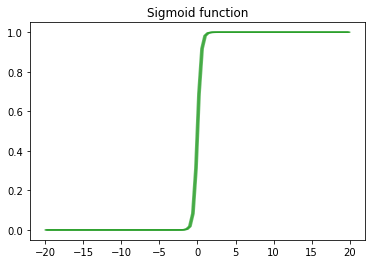

In [3]:
# Testing the function with random input
X = np.linspace(-20,20,400).reshape(100,4)
theta = np.ones(X.shape[1])
Y = _logistic_hypothesis(X, theta)

# We use scatter plot since the input is randomized
plt.plot(X, Y, color="tab:green", label="Sigmoid", alpha=0.7);
plt.title("Sigmoid function");

**Comment:** The sigmoid function represent the S-shaped curve line, in which it will works out as a binary classifier based on the input. Each of the point on the left below area is closer to 0, and the opposite points on the top right area is closer to 1.

These points lies into the group of accurately predicted points since they are closer to 0 or 1 (i.e they are ensured to be either this class or the other class). On the other hand, points staying in the middle of the curve tends to be around 0.5, where it may have a chance to fall into one of two classes.

### **[Problem 2] Steepest descent**

In [4]:
def _gradient_descent(X, theta, error, lr):
        """
        Compute the new weight using learning rate
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data

        error : The follow forms of ndarray, shape(n_samples, )
          The vector returned from hypothetical function

        Returns
        -------
          The following form of ndarray, shape (n_samples, 1)
          Estimated result by logistic hypothetical function

        """
        m = len(X)
        reg = np.full(theta.shape, 0.1)
        theta = theta - (lr/m * (X.T).dot(error) + 1/m * (reg.T).dot(theta))

        return theta

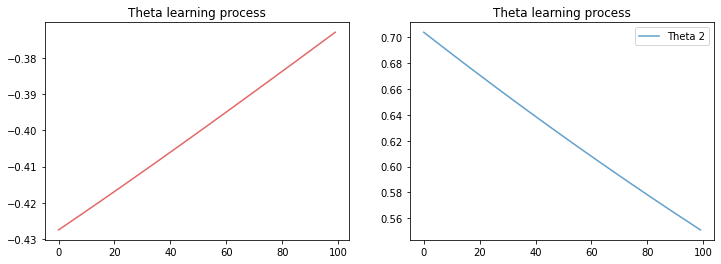

In [5]:
# Testing the function with random input
n = 500 # sample
m = 5 # feature
X = np.random.randn(n,m)
Y_true = np.random.randint(1, size=(n,1))
theta = np.random.randn(m,1)

iter = 100
theta_update = []
for i in range(iter):
  y_pred = _logistic_hypothesis(X, theta)
  error = y_pred - Y_true
  theta = _gradient_descent(X, theta, error, 0.01)
  theta_update.append(theta)

# Observe the change of some theta values
theta_1 = np.array(theta_update)[:,1]
theta_2 = np.array(theta_update)[:,2]
fig, axes = plt.subplots(1,2, figsize=(12,4))
axes[0].plot(range(0,100), theta_1, color="tab:red", label="Theta 1", alpha=0.7)
axes[0].set_title("Theta learning process")
axes[1].plot(range(0,100), theta_2, color="tab:blue", label="Theta 2", alpha=0.7)
axes[1].set_title("Theta learning process")
plt.legend();

### **[Problem 3] Estimated**

In [6]:
def predict(X, theta):
        """
        Estimate using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        y_pred = _logistic_hypothesis(X, theta)
        return np.where(y_pred < 0.5, 0, 1) # Return the element of y that snapped to 0 if y[i] < 0.5 and snapped to 1 if y[i] > 0.5

In [7]:
# Testing the function with random input
X = np.random.randn(100,5)
theta = np.ones(m)

y_pred = predict(X, theta)
y_pred

array([1, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0])

In [8]:
def predict_proba(X, theta):
        """
        Estimate using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """
        y_pred = _logistic_hypothesis(X, theta)
        return np.around(y_pred,2)

In [9]:
# Testing the function with random input
X = np.random.randn(100,5)
theta = np.ones(m)

y_pred = predict_proba(X, theta)
y_pred

array([0.13, 0.07, 0.35, 0.14, 0.05, 0.99, 0.01, 0.01, 0.81, 0.91, 0.88,
       0.49, 0.16, 0.24, 0.74, 0.02, 0.91, 0.82, 0.57, 0.17, 0.97, 0.95,
       0.15, 0.3 , 0.96, 0.94, 0.12, 0.67, 0.84, 0.12, 0.92, 0.99, 0.59,
       0.21, 0.97, 0.86, 0.13, 0.05, 0.62, 0.66, 0.92, 0.02, 0.03, 0.01,
       0.16, 0.25, 0.62, 0.92, 0.92, 0.43, 0.21, 0.96, 0.81, 0.19, 0.05,
       0.37, 0.72, 1.  , 0.7 , 0.69, 0.9 , 0.84, 0.05, 0.83, 0.89, 0.08,
       0.23, 0.8 , 0.94, 0.09, 0.77, 0.18, 0.23, 0.52, 0.28, 0.09, 0.21,
       0.96, 0.52, 0.26, 0.92, 0.18, 0.37, 0.51, 0.82, 0.73, 0.44, 0.26,
       0.02, 0.34, 0.47, 0.3 , 0.62, 0.81, 0.13, 0.61, 0.33, 0.6 , 0.59,
       0.91])

### **[Problem 4] Objective function**

In [10]:
def _loss_function(X, Y, theta, h_x):
        """
        Compute the loss during the weight and bias improving process
        Parameters
        ----------
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data

        y_pred : The following form of ndarray, shape (n_samples,)
            Predicted value of training data

        Returns
        ------------
        loss : float
            Loss value between predicted and true value of training data

        """
        reg = np.full(theta.shape, 0.1)
        m = X.shape[0]
        
        loss = 1/m * (-Y.T.dot(np.log(h_x)) - (1 - Y).T.dot(np.log(1 - h_x))) + (1/(2*m) * reg.T.dot(theta**2))

        return float(loss)

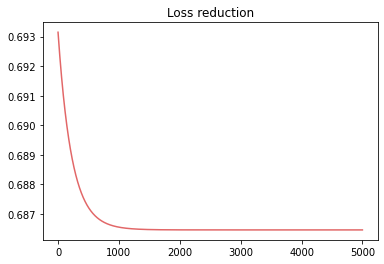

In [11]:
# Testing the function with random input
m = 500 # sample
n = 5 # feature
X = np.random.randn(m,n)
Y_true = np.random.randint(1, size=(m,1))
theta = np.zeros(n).reshape(-1,1)
iter = 5000
loss_update = np.zeros(iter)

for i in range(iter):
  y_pred = _logistic_hypothesis(X, theta)
  error = y_pred - Y_true 
  loss = _loss_function(X, Y_true, theta, y_pred)
  loss_update[i] = loss
  theta = _gradient_descent(X, theta, error, 0.01)

# Observe the change of some theta values
plt.plot(range(0,5000), loss_update, color="tab:red", label="Loss", alpha=0.7);
plt.title("Loss reduction");

### **[Problem 5] Learning and estimation**

In [92]:
class ScratchLogisticRegression():
    """
    Scratch implementation of logistic regression
    Parameters
    ----------
    num_iter : int
      Number of iterations
    lr : float
      Learning rate
    no_bias : bool
      True if no bias term is included
    verbose : bool
      True to output the learning process
    Attributes
    ----------
    self.coef_ : The following form of ndarray, shape (n_features,)
      Parameters
    self.loss : The following form of ndarray, shape (self.iter,)
      Record losses on training data
    self.val_loss : The following form of ndarray, shape (self.iter,)
      Record loss on validation data
    """
    def __init__(self, num_iter, lr, reg, bias, verbose):
        # Record hyperparameters as attributes
        self.iter = num_iter
        self.lr = lr
        self.reg = reg
        self.bias = bias
        self.verbose = verbose
        # Prepare an array to record the loss
        self.loss = np.zeros(self.iter)
        self.val_loss = np.zeros(self.iter)

    def fit(self, X, y, X_val=None, y_val=None):
        """
        Learn logistic regression. If validation data is entered, the loss and accuracy for it are also calculated for each iteration.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            Features of training data
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data
        X_val : The following forms of ndarray, shape (n_samples, n_features)
            Features of verification data
        y_val : The following form of ndarray, shape (n_samples,)
            Correct value of verification data
        """
        # Initialization

        self.m = X.shape[0] # m = Number of example

        self.n = X.shape[1] # n = Number of features

        X_train = X

        y_train = y
        
        if self.bias == False:
            self.theta = np.random.uniform(low=0.5, high=1.5, size=(self.n+1)).reshape(-1,1)
            X_train = np.c_[np.zeros(len(X_train)), X_train]

            if X_val is None:
                X_val = 0
            else:
                X_val = np.c_[np.zeros(len(X_val)), X_val]

        elif self.bias == True:
            self.theta = np.random.uniform(low=0.5, high=1.5, size=(self.n+1)).reshape(-1,1) # Inlcuding the x0 feature where x0 = 1
            X_train = np.c_[np.ones(len(X_train)), X_train]
                                    
            if X_val is None:
                X_val = 0
            else:
                X_val = np.c_[np.ones(len(X_val)), X_val]
  

        for i in range(self.iter):
            h_train = self.predict_proba(X_train) # If we use predict, the predicted y may cause the loss function converge to infinity
            
            error = h_train - y_train
            
            train_loss = self._loss_function(X_train, y_train, h_train)

            self.loss[i] = train_loss

            if not (X_val is None):
              h_val = self.predict_proba(X_val)
              
              val_loss = self._loss_function(X_val, y_val, h_val)

              self.val_loss[i] = val_loss

        
            theta = self._gradient_descent(X_train, error)

            if self.verbose:
              if ((i % 500) == 0):
                #Output learning process when verbose is set to True
                if not (X_val is None):
                  print("Iteration {} -- train loss: {} -- val loss: {}".format(i, train_loss, val_loss))

                else: print("Iteration {} -- train loss: {}".format(i, train_loss))


    def _gradient_descent(self, X, error):
        """
        Compute the new weight using learning rate
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data

        error : The follow forms of ndarray, shape(n_samples, )
          The estimation from predict function

        Returns
        -------
          The following form of ndarray, shape (n_samples, 1)
          Estimated result by logistic hypothetical function

        """
        m = len(X)
        theta = self.theta
        theta[0] = 0 # The parameter value does not contain regularization term

        self.theta = self.theta - (self.lr/m * (X.T).dot(error) + 1/m * np.multiply(self.reg, theta))
        
        return self.theta

  
    def _logistic_hypothesis(self, X):
        """
        Compute a logistic hypothetical function
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
          Training data
        Returns
        -------
          The following form of ndarray, shape (n_samples, 1)
          Estimated result by logistic hypothetical function

        """
        
        hypothesis = 1/(1 + np.exp(-X.dot(self.theta)))
        
        return hypothesis


    def predict(self, X):
        """
        Estimate the label using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """

        y_pred = self._logistic_hypothesis(X)

        return np.where(y_pred < 0.5, 0, 1) # Return the element of y that snapped to 0 if y[i] < 0.5 and snapped to 1 if y[i] > 0.5

    def predict_proba(self, X):
        """
        Estimate the probability using logistic regression.
        Parameters
        ----------
        X : The following forms of ndarray, shape (n_samples, n_features)
            sample
        Returns
        -------
            The following form of ndarray, shape (n_samples, 1)
            Estimated result by logistic regression
        """

        y_pred = self._logistic_hypothesis(X)
        return np.around(y_pred,4)


    def _loss_function(self, X, Y, h_x):
        """
        Compute the loss during the weight and bias improving process
        Parameters
        ----------
        y : The following form of ndarray, shape (n_samples,)
            Correct answer value of training data

        y_pred : The following form of ndarray, shape (n_samples,)
            Predicted value of training data

        Returns
        ------------
        loss : float
            Loss value between predicted and true value of training data

        """
        m = X.shape[0]
        theta = self.theta
        theta[0] = 0

        loss = (1/m * (np.dot(-Y.T, np.log(h_x)) - np.dot((1-Y).T, np.log(1 - h_x)))) + (0.5*m * np.multiply(self.reg, np.sum(theta**2)))

        return float(loss)

**Data Preparation**

In [140]:
from sklearn.datasets import load_iris
iris = load_iris()

In [141]:
df_train = pd.DataFrame(data=iris.data[50:], columns=iris.feature_names).drop(columns=['petal length (cm)', 'petal width (cm)'])
df_train

,sepal length (cm),sepal width (cm)
0,7.0,3.2
1,6.4,3.2
2,6.9,3.1
3,5.5,2.3
4,6.5,2.8
...,...,...
95,6.7,3.0
96,6.3,2.5
97,6.5,3.0
98,6.2,3.4


In [142]:
target = pd.DataFrame(data=iris.target[50:], columns=["target"])
target.loc[target.target == 1, 'target'] = 0
target.loc[target.target == 2, 'target'] = 1
target

,target
0,0
1,0
2,0
3,0
4,0
...,...
95,1
96,1
97,1
98,1


The target versicolor will be labeled as class 0, and the target virginica will be labeled as 1.

In [143]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(df_train, target, random_state=42)

In [144]:
print("Train dataset -- Rows: {}, Columns: {}".format(X_train.shape[0], X_train.shape[1]))
print("Test dataset -- Rows: {}, Columns: {}".format(X_val.shape[0], X_val.shape[1]))

Train dataset -- Rows: 75, Columns: 2
Test dataset -- Rows: 25, Columns: 2


In [145]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)

In [146]:
# Hyperparameters setting
iter = 5000
lr = 0.001
reg = 0.1
bias = True
verbose = True

scratch_log_model = ScratchLogisticRegression(iter, lr, reg, bias, verbose)
scratch_log_model.fit(X_train, np.array(Y_train), X_val, Y_val)

Iteration 0 -- train loss: 14.146090181373047 -- val loss: 5.084053694600105
Iteration 500 -- train loss: 3.9716245655080518 -- val loss: 1.6773025817171063
Iteration 1000 -- train loss: 1.568110995355305 -- val loss: 0.9032438925606145
Iteration 1500 -- train loss: 0.9897404867157247 -- val loss: 0.7354478292198334
Iteration 2000 -- train loss: 0.8341569149272708 -- val loss: 0.6973251550433486
Iteration 2500 -- train loss: 0.7850302518704468 -- val loss: 0.6873978403290605
Iteration 3000 -- train loss: 0.7672266454957362 -- val loss: 0.6843540759373401
Iteration 3500 -- train loss: 0.7602011665427545 -- val loss: 0.6832018484910678
Iteration 4000 -- train loss: 0.7573013963697512 -- val loss: 0.6827851757448512
Iteration 4500 -- train loss: 0.7560725619314898 -- val loss: 0.682594363298367


Making some predictions and verification

Since our model has the shape of X as (m_sample, n_features + 1) due to its bias element, we need to a column filled with ones again to the train and validation dataset

In [147]:
X_train = np.c_[np.ones(len(X_train)), X_train]
X_val = np.c_[np.ones(len(X_val)), X_val]
X_train.shape

(75, 3)

In [148]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

In [149]:
# Use the predict for the predicted labels
y_pred = scratch_log_model.predict(X_val)

# Testing out the metrics
acc_score = accuracy_score(Y_val, y_pred)
prec_score = precision_score(Y_val, y_pred, average='binary')
rec_score = recall_score(Y_val, y_pred, average='binary')
f_score = f1_score(Y_val, y_pred, average='binary')
conf_matrix = confusion_matrix(Y_val, y_pred)
print("Accuracy score: {}\n Precision score: {}\n Recall score: {}\n F1 score: {}\n Confusion matrix: \n{}".format(acc_score, prec_score, rec_score, f_score, conf_matrix))

Accuracy score: 0.84
 Precision score: 0.7692307692307693
 Recall score: 0.9090909090909091
 F1 score: 0.8333333333333333
 Confusion matrix: 
[[11  3]
 [ 1 10]]


The accuracy is good but not as we expected, and it is maybe due to the low sample of testing data. The precision score is quite lower than recall score since it the number of correct prediction for versicolor (true positive) is not so high.

As we can see it in the confusion matrix, the model predicted correctly 10 samples as versicolor, and there are 3 samples that were actually virginica, but predicted as versicolor. Hence the precision for predicting corresponding to actual label is not as we expected (0.76)

Meanwhile, the number of correct prediction in one class is great which results in a high recall score. As in the confusion matrix, the number of sample predicted as versicolor is 10, and the number of sample that was actually labeled as versicolor but was predicted as virginica is 1.

### **[Problem 6] Learning curve plot**

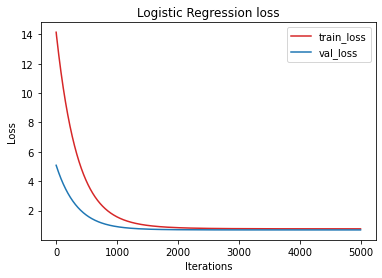

In [150]:
train_loss = scratch_log_model.loss
val_loss = scratch_log_model.val_loss
iteration = range(1, scratch_log_model.iter+1)

plt.plot(iteration, train_loss, label = "train_loss", color='tab:red')
plt.plot(iteration, val_loss, label = "val_loss", color='tab:blue')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Logistic Regression loss')
plt.legend()
plt.show()

### **Optional: Removing bias term**

In [151]:
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(df_train, target, random_state=42)

In [152]:
print("Train dataset -- Rows: {}, Columns: {}".format(X_train.shape[0], X_train.shape[1]))
print("Test dataset -- Rows: {}, Columns: {}".format(X_val.shape[0], X_val.shape[1]))

Train dataset -- Rows: 75, Columns: 2
Test dataset -- Rows: 25, Columns: 2


In [153]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_val = sc.fit_transform(X_val)

In [154]:
# Hyperparameters setting
iter = 5000
lr = 0.001
reg = 0.1
bias = False
verbose = True

scratch_log_model_nobias = ScratchLogisticRegression(iter, lr, reg, bias, verbose)
scratch_log_model_nobias.fit(X_train, np.array(Y_train), X_val, Y_val)

Iteration 0 -- train loss: 11.12357988473235 -- val loss: 4.06880145373509
Iteration 500 -- train loss: 3.230160663703805 -- val loss: 1.4304327208010204
Iteration 1000 -- train loss: 1.3793050130041635 -- val loss: 0.843758006098823
Iteration 1500 -- train loss: 0.9347503139752408 -- val loss: 0.7194093709419412
Iteration 2000 -- train loss: 0.8150427882947963 -- val loss: 0.6920684443475569
Iteration 2500 -- train loss: 0.7774133152563554 -- val loss: 0.685323248328031
Iteration 3000 -- train loss: 0.7639429584805582 -- val loss: 0.6834377565489799
Iteration 3500 -- train loss: 0.758736554828984 -- val loss: 0.6828130222098713
Iteration 4000 -- train loss: 0.7566287172580214 -- val loss: 0.6825930930705331
Iteration 4500 -- train loss: 0.7557704350891641 -- val loss: 0.68251485746418


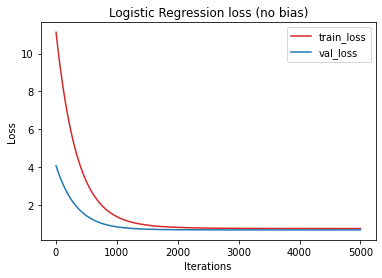

In [155]:
train_loss_nobias = scratch_log_model_nobias.loss
val_loss_nobias = scratch_log_model_nobias.val_loss
iteration_nobias = range(1, scratch_log_model_nobias.iter+1)

plt.plot(iteration_nobias, train_loss_nobias, label = "train_loss", color='tab:red')
plt.plot(iteration_nobias, val_loss_nobias, label = "val_loss", color='tab:blue')

plt.xlabel('Iterations')
plt.ylabel('Loss')
plt.title('Logistic Regression loss (no bias)')
plt.legend()
plt.show()

Seems like there is no difference between the model with bias and that without bias.

### **[Problem 7] Visualization of decision area**

/usr/local/lib/python3.7/dist-packages/mlxtend/plotting/decision_regions.py:244: MatplotlibDeprecationWarning: Passing unsupported keyword arguments to axis() will raise a TypeError in 3.3.
  ax.axis(xmin=xx.min(), xmax=xx.max(), y_min=yy.min(), y_max=yy.max())


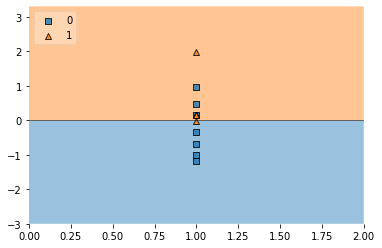

In [177]:
from mlxtend.plotting import plot_decision_regions
X_val_new = np.c_[np.ones(len(X_val)), X_val]

value = scratch_log_model.theta[0]
width = 0.75
plot = plot_decision_regions(np.array(X_val_new), np.array(Y_val).flatten(), clf=scratch_log_model,
                      filler_feature_values={2: value},
                      filler_feature_ranges={2: width},
                      legend=2);
plot

### **[Problem 8] (Advance assignment) Saving weights**

In [180]:
# Save weights into npz file
from tempfile import TemporaryFile
outfile = TemporaryFile()

weight = scratch_log_model.theta
np.savez(outfile, weight)

In [188]:
# Load
_ = outfile.seek(0)
npzfile = np.load(outfile)
npzfile.files

['arr_0']

In [189]:
npzfile['arr_0']

array([[2.00186667e-05],
       [1.52743379e-01],
       [6.66313059e-02]])